<a href="https://colab.research.google.com/github/AbdurRahmaneee/machine_learning_projects/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduciton to convolutional neural networks and computer vision with tensorflow

compputer vision is the pracitce of writing algorithm which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

however we've modified it to only use two classes (pizza & steak) using image data modification notebook: extras/image_data_modification.ipynb

> We start with small dataset so we can experiment what works (or better yet what doesn't work) before scaling up.

In [46]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-31 14:35:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.128, 142.250.188.48, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   182MB/s    in 0.6s    

2022-08-31 14:35:38 (182 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



 ## Inspect the data (become one with it)

 A very crucial step at the beginning of any machine learning project is becoming one with the data. And for a computer vision project... this usually means visualizing many samples of your data.




In [47]:
!ls pizza_steak

test  train


In [48]:
!ls pizza_steak/train/

pizza  steak


In [49]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [50]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoris and {len(filenames)} images in '{dirpath}'.")


There are 2 directoris and 0 images in 'pizza_steak'.
There are 2 directoris and 0 images in 'pizza_steak/test'.
There are 0 directoris and 250 images in 'pizza_steak/test/pizza'.
There are 0 directoris and 250 images in 'pizza_steak/test/steak'.
There are 2 directoris and 0 images in 'pizza_steak/train'.
There are 0 directoris and 750 images in 'pizza_steak/train/pizza'.
There are 0 directoris and 750 images in 'pizza_steak/train/steak'.


In [51]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Aug 31 10:12 .
drwxr-xr-x 1 root root 4096 Aug 31 14:35 ..
drwxr-xr-x 4 root root 4096 Aug 31 10:12 test
drwxr-xr-x 4 root root 4096 Aug 31 10:12 train


In [52]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [53]:
os.listdir("pizza_steak/train/steak")

['827764.jpg',
 '1512226.jpg',
 '1190233.jpg',
 '3140083.jpg',
 '358045.jpg',
 '2526838.jpg',
 '1225762.jpg',
 '735441.jpg',
 '3577732.jpg',
 '2855315.jpg',
 '2614649.jpg',
 '1961025.jpg',
 '1889336.jpg',
 '1942333.jpg',
 '3140147.jpg',
 '1335556.jpg',
 '1684438.jpg',
 '2807888.jpg',
 '270687.jpg',
 '2984311.jpg',
 '660900.jpg',
 '2760475.jpg',
 '2826987.jpg',
 '3110387.jpg',
 '2880035.jpg',
 '1382427.jpg',
 '2396291.jpg',
 '3707493.jpg',
 '2437843.jpg',
 '2927833.jpg',
 '443210.jpg',
 '32693.jpg',
 '6709.jpg',
 '2403776.jpg',
 '388776.jpg',
 '2230959.jpg',
 '2771149.jpg',
 '31881.jpg',
 '413325.jpg',
 '3113772.jpg',
 '1524526.jpg',
 '2912290.jpg',
 '1618011.jpg',
 '1816235.jpg',
 '1313316.jpg',
 '1976160.jpg',
 '767442.jpg',
 '1600179.jpg',
 '3223400.jpg',
 '1445352.jpg',
 '1966967.jpg',
 '3245533.jpg',
 '332232.jpg',
 '2910418.jpg',
 '2287136.jpg',
 '377190.jpg',
 '3792514.jpg',
 '2013535.jpg',
 '9555.jpg',
 '3766099.jpg',
 '3743286.jpg',
 '674001.jpg',
 '2890573.jpg',
 '6926.jpg',
 

To visualize our images, first let's get the class names programmatically.


In [54]:
# Get the classanames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [55]:
sorted([item.name for item in data_dir.glob("*")])

['pizza', 'steak']

In [56]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images form here)
  target_folder = target_dir+ target_class
  print(target_folder)
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) 
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shaspe of the image
  return img





pizza_steak/train/pizza
['527199.jpg']
Image shape: (512, 512, 3)


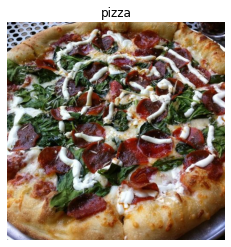

In [57]:
# View a random image from the trianing dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

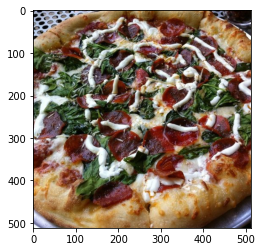

In [58]:
plt.imshow(img)

In [59]:

img.dtype

dtype('uint8')

In [60]:
img

array([[[ 88,  91,  82],
        [114, 119, 113],
        [172, 176, 177],
        ...,
        [ 12,   7,   1],
        [ 14,   9,   3],
        [ 16,  11,   5]],

       [[ 12,  14,   9],
        [ 23,  27,  26],
        [ 56,  61,  64],
        ...,
        [ 13,   8,   2],
        [ 15,  10,   4],
        [ 17,  12,   6]],

       [[  0,   3,   4],
        [ 11,  15,  18],
        [  0,   1,  10],
        ...,
        [ 14,   9,   3],
        [ 16,  11,   5],
        [ 17,  14,   7]],

       ...,

       [[221, 225, 228],
        [239, 243, 246],
        [251, 255, 255],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  3,   2,   0]],

       [[183, 183, 195],
        [210, 213, 222],
        [239, 242, 249],
        ...,
        [  2,   3,   0],
        [  2,   3,   0],
        [  3,   2,   0]],

       [[151, 150, 166],
        [166, 165, 179],
        [194, 197, 206],
        ...,
        [  2,   3,   0],
        [  2,   3,   0],
        [  3,   3,   0]]

In [61]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 88,  91,  82],
        [114, 119, 113],
        [172, 176, 177],
        ...,
        [ 12,   7,   1],
        [ 14,   9,   3],
        [ 16,  11,   5]],

       [[ 12,  14,   9],
        [ 23,  27,  26],
        [ 56,  61,  64],
        ...,
        [ 13,   8,   2],
        [ 15,  10,   4],
        [ 17,  12,   6]],

       [[  0,   3,   4],
        [ 11,  15,  18],
        [  0,   1,  10],
        ...,
        [ 14,   9,   3],
        [ 16,  11,   5],
        [ 17,  14,   7]],

       ...,

       [[221, 225, 228],
        [239, 243, 246],
        [251, 255, 255],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  3,   2,   0]],

       [[183, 183, 195],
        [210, 213, 222],
        [239, 242, 249],
        ...,
        [  2,   3,   0],
        [  2,   3,   0],
        [  3,   2,   0]],

       [[151, 150, 166],
        [166, 165, 179],
        [194, 197, 206],
        ...,
        [  2,   3,   

In [62]:
# view the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [63]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.34509804, 0.35686275, 0.32156863],
        [0.44705882, 0.46666667, 0.44313725],
        [0.6745098 , 0.69019608, 0.69411765],
        ...,
        [0.04705882, 0.02745098, 0.00392157],
        [0.05490196, 0.03529412, 0.01176471],
        [0.0627451 , 0.04313725, 0.01960784]],

       [[0.04705882, 0.05490196, 0.03529412],
        [0.09019608, 0.10588235, 0.10196078],
        [0.21960784, 0.23921569, 0.25098039],
        ...,
        [0.05098039, 0.03137255, 0.00784314],
        [0.05882353, 0.03921569, 0.01568627],
        [0.06666667, 0.04705882, 0.02352941]],

       [[0.        , 0.01176471, 0.01568627],
        [0.04313725, 0.05882353, 0.07058824],
        [0.        , 0.00392157, 0.03921569],
        ...,
        [0.05490196, 0.03529412, 0.01176471],
        [0.0627451 , 0.04313725, 0.01960784],
        [0.06666667, 0.05490196, 0.02745098]],

       ...,

       [[0.86666667, 0.88235294, 0.89411765],
        [0.9372549 , 0.95294118, 0.96470588],
        [0.98431373, 1

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing the data (get all  of the pixel values between 0 & 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
